In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem as ch
#from padelpy import from_smiles
#from padelpy import from_mdl

RDKit WARNING: [14:25:17] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_excel('C:\\Users\\HP\\AZC_Internship\\Data\\ChemBL\\AKT-binding_simplified.xlsx',sheet_name = 'Step3')
df.head()

,Sno,ChEMBL_ID,Smiles,Standard_Value,Standard_Units,pChEMBL_Value,Class
0,1,CHEMBL3403664,C[C@H](Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(S(C)(=O...,0.10,nM,10.00,1
1,2,CHEMBL3899716,Cc1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br)CC3...,0.10,nM,10.00,1
2,3,CHEMBL3966806,CC(C)c1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br...,0.15,nM,9.82,1
3,4,CHEMBL379300,Cc1n[nH]c2ccc(-c3cncc(OC[C@@H](N)Cc4c[nH]c5ccc...,0.16,nM,9.80,1
4,5,CHEMBL573326,N[C@H](COc1cncc(-c2ccc3c(c2)C(c2ccco2)C(=O)N3)...,0.17,nM,9.77,1


In [4]:
rows, cols = df.shape
for i in range(rows):
    m2 = ch.MolFromSmiles(df.iloc[i,2])
    print(ch.MolToMolBlock(m2),file=open(str(df.iloc[i,1])+'.mol','w+'))

<h2>PaDeL Descriptors</h2>

In [ ]:
# #OLD
# rows, cols = df.shape
# X = []
# not_eval = []
# for i in range(rows):
#     if((i)%29==0):
#         print("Percentage = {}".format((i)/2861*100))
#     try:
#         data = from_smiles(df.iloc[i,2],timeout=60)
#         dict2 = {'CHEMBLID':df.iloc[i,1]}
#         data.update(dict2)
#         X.append(data)
#     except:
#         not_eval.append(df.iloc[i,1])
#         continue
# X_data = pd.DataFrame(X)
# X_data.to_csv('PADEL_Descriptors.csv')

Percentage = 0.0


In [3]:
X_data = pd.read_csv('C:\\Users\\HP\\AZC_Internship\\Data\\Descriptor data\\Padel descriptors\\actual_padel_akt.csv')
X_data.shape

(2861, 1445)

In [6]:
X_data.isna().sum()

Name      0
nAcid     0
ALogP     0
ALogp2    0
AMR       0
         ..
WTPT-5    0
WPATH     0
WPOL      0
XLogP     0
Zagreb    0
Length: 1445, dtype: int64

In [5]:
X_data['ChemBLID'] = X_data['Name'].str.split('_',expand=True)[1]
X_data.head()

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,ChemBLID
0,AUTOGEN_CHEMBL1078983,0,-0.7109,0.505379,70.4932,73.378583,16,18,65,34,...,70.514766,2.073964,27.938805,11.267053,16.671753,3404.0,59.0,2.188,184.0,CHEMBL1078983
1,AUTOGEN_CHEMBL1079175,0,-1.4578,2.125181,44.0418,64.304653,18,20,52,31,...,65.167083,2.102164,17.955201,2.565237,15.389964,2593.0,55.0,6.575,180.0,CHEMBL1079175
2,AUTOGEN_CHEMBL1081198,0,0.0748,0.005595,27.2874,69.268860,27,29,57,37,...,76.232497,2.060338,31.795843,2.556014,22.098211,4979.0,56.0,5.589,198.0,CHEMBL1081198
3,AUTOGEN_CHEMBL1089661,0,-10.0458,100.918098,183.2952,142.418303,6,6,135,64,...,125.580825,1.962200,61.611922,20.276064,41.335857,21440.0,92.0,-0.194,302.0,CHEMBL1089661
4,AUTOGEN_CHEMBL1090115,0,-1.7897,3.203026,32.3564,58.685481,21,23,47,30,...,62.402934,2.080098,16.872064,13.655728,3.216336,2319.0,52.0,4.844,168.0,CHEMBL1090115


In [6]:
X_data.ChemBLID.describe()

count              2861
unique             2861
top       CHEMBL3318715
freq                  1
Name: ChemBLID, dtype: object

In [9]:
X = X_data.drop(columns=['Name'],inplace=False).copy()
X['pChemBL'] = X.ChemBLID.map(df.set_index('ChEMBL_ID')['pChEMBL_Value'])

In [11]:
print(X['pChemBL'].isnull().sum())
X.head()

0


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,ChemBLID,pChemBL
0,0,-0.7109,0.505379,70.4932,73.378583,16,18,65,34,31,...,2.073964,27.938805,11.267053,16.671753,3404.0,59.0,2.188,184.0,CHEMBL1078983,6.82
1,0,-1.4578,2.125181,44.0418,64.304653,18,20,52,31,21,...,2.102164,17.955201,2.565237,15.389964,2593.0,55.0,6.575,180.0,CHEMBL1079175,7.64
2,0,0.0748,0.005595,27.2874,69.268860,27,29,57,37,20,...,2.060338,31.795843,2.556014,22.098211,4979.0,56.0,5.589,198.0,CHEMBL1081198,4.30
3,0,-10.0458,100.918098,183.2952,142.418303,6,6,135,64,71,...,1.962200,61.611922,20.276064,41.335857,21440.0,92.0,-0.194,302.0,CHEMBL1089661,6.03
4,0,-1.7897,3.203026,32.3564,58.685481,21,23,47,30,17,...,2.080098,16.872064,13.655728,3.216336,2319.0,52.0,4.844,168.0,CHEMBL1090115,6.42


In [12]:
df.loc[(df.ChEMBL_ID == 'CHEMBL1078983')|(df.ChEMBL_ID == 'CHEMBL1079175')|(df.ChEMBL_ID == 'CHEMBL1081198')|(df.ChEMBL_ID == 'CHEMBL1089661')|(df.ChEMBL_ID == 'CHEMBL1090115')]

,Sno,ChEMBL_ID,Smiles,Standard_Value,Standard_Units,pChEMBL_Value,Class
816,817,CHEMBL1079175,NC1(c2ccc(-c3nc4ccn5c(=O)[nH]nc5c4cc3-c3ccccc3...,22.8,nM,7.64,1
1524,1,CHEMBL1078983,COc1ccc(-c2ccc3c(N4CCOCC4)nc(N4C[C@H](C)O[C@H]...,150.0,nM,6.82,0
1894,371,CHEMBL1090115,COc1ccc2[nH]c(-c3ccccc3)c(/C=C3\Oc4cc(O)cc(O)c...,385.0,nM,6.42,0
2198,675,CHEMBL1089661,CCC[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H]1C...,940.0,nM,6.03,0
2820,1297,CHEMBL1081198,O=C(Nc1cccc(-c2cn3ccnc3c(NCc3ccncc3)n2)c1)Nc1c...,50000.0,nM,4.30,0


In [10]:
variance = X.drop(columns=['ChemBLID'],inplace=False).astype(dtype='float64').var(axis=0,ddof=0,skipna= True)
means = X.drop(columns=['ChemBLID'],inplace=False).astype(dtype='float64').abs().sum(axis=0)/2861
variance.isnull().sum()

0

In [11]:
print((means == 0).astype(int).sum(),(variance==0).astype(int).sum())

236 236


In [12]:
bad_cols = []
for cols in means.index:
    if means[cols] == 0:
        bad_cols.append(cols)
print(len(bad_cols))
bad_cols

236


['nB',
 'nBondsQ',
 'nHsNH3p',
 'nHssNH2p',
 'nHsssNHp',
 'nHmisc',
 'nsLi',
 'nssBe',
 'nssssBem',
 'nsBH2',
 'nssBH',
 'nsssB',
 'nssssBm',
 'nddC',
 'nsNH3p',
 'nssNH2p',
 'nsssNHp',
 'nddsN',
 'naOm',
 'nsSiH3',
 'nssSiH2',
 'nsssSiH',
 'nssssSi',
 'nsPH2',
 'nssPH',
 'nsssP',
 'nddsP',
 'nsssssP',
 'ndssS',
 'nssssssS',
 'nSm',
 'nsGeH3',
 'nssGeH2',
 'nsssGeH',
 'nssssGe',
 'nsAsH2',
 'nssAsH',
 'nsssAs',
 'ndsssAs',
 'nddsAs',
 'nsssssAs',
 'nsSeH',
 'ndSe',
 'naaSe',
 'ndssSe',
 'nssssssSe',
 'nddssSe',
 'nsSnH3',
 'nssSnH2',
 'nsssSnH',
 'nssssSn',
 'nsPbH3',
 'nssPbH2',
 'nsssPbH',
 'nssssPb',
 'SHsNH3p',
 'SHssNH2p',
 'SHsssNHp',
 'SHmisc',
 'SsLi',
 'SssBe',
 'SssssBem',
 'SsBH2',
 'SssBH',
 'SsssB',
 'SssssBm',
 'SddC',
 'SsNH3p',
 'SssNH2p',
 'SsssNHp',
 'SddsN',
 'SaOm',
 'SsSiH3',
 'SssSiH2',
 'SsssSiH',
 'SssssSi',
 'SsPH2',
 'SssPH',
 'SsssP',
 'SddsP',
 'SsssssP',
 'SdssS',
 'SssssssS',
 'SSm',
 'SsGeH3',
 'SssGeH2',
 'SsssGeH',
 'SssssGe',
 'SsAsH2',
 'SssAsH',
 'Ss

In [13]:
X.drop(columns = bad_cols, inplace=True)
means.drop(labels = bad_cols,inplace = True)
variance.drop(labels = bad_cols,inplace = True)

In [17]:
X.columns.size
X.to_csv('removed_zeros_AKT.csv')

In [2]:
X= pd.read_csv('no_zeros_no_chembl.csv')
#X.drop(columns=['ChemBLID'],inplace=True)
X.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pChemBL
0,0,-0.7109,0.505379,70.4932,73.378583,16,18,65,34,31,...,70.514766,2.073964,27.938805,11.267053,16.671753,3404,59,2.188,184,6.82
1,0,-1.4578,2.125181,44.0418,64.304653,18,20,52,31,21,...,65.167083,2.102164,17.955201,2.565237,15.389964,2593,55,6.575,180,7.64
2,0,0.0748,0.005595,27.2874,69.268860,27,29,57,37,20,...,76.232497,2.060338,31.795843,2.556014,22.098211,4979,56,5.589,198,4.30
3,0,-10.0458,100.918098,183.2952,142.418303,6,6,135,64,71,...,125.580825,1.962200,61.611922,20.276064,41.335857,21440,92,-0.194,302,6.03
4,0,-1.7897,3.203026,32.3564,58.685481,21,23,47,30,17,...,62.402934,2.080098,16.872064,13.655728,3.216336,2319,52,4.844,168,6.42


In [3]:
variance = X.astype(dtype='float64').var(axis=0,ddof=0)
means = X.astype(dtype='float64').abs().sum(axis=0)/2861
print((means == 0).astype(int).sum(),(variance == 0).astype(int).sum())

0 0


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  


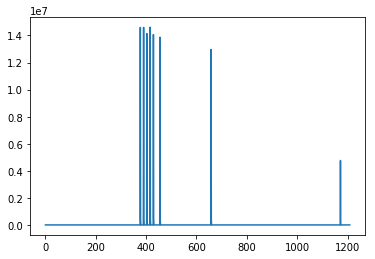

In [34]:
normal = variance/means
plt.plot(range(len(variance)),normal.data)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


(array([1.202e+03, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 6.000e+00]),
 array([2.03324166e-05, 1.46091855e+06, 2.92183709e+06, 4.38275564e+06,
        5.84367418e+06, 7.30459273e+06, 8.76551127e+06, 1.02264298e+07,
        1.16873484e+07, 1.31482669e+07, 1.46091855e+07]),
 <a list of 10 Patch objects>)

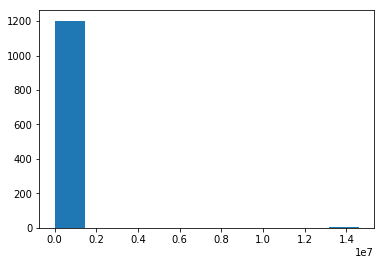

In [35]:
plt.hist(normal.data)

In [36]:
high_var_cols = []
for cols in normal.index:
    if normal[cols] > 1*(10^7):
        high_var_cols.append(cols)
print(len(high_var_cols))

180


Splitting the high and low variance columns for better visualisation

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.data is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  


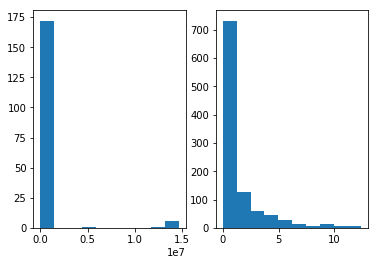

In [9]:

normal_high = normal[high_var_cols]
normal_low =  normal.drop(labels=high_var_cols,inplace=False)
plt.subplot(1,2,1)
plt.hist(normal_high.data)
plt.subplot(1,2,2)
plt.hist(normal_low.data)
plt.show()

In [10]:
high_var_cols

['Unnamed: 0',
 'ALogp2',
 'AMR',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0e',
 'ATS1e',
 'ATS2e',
 'ATS3e',
 'ATS4e',
 'ATS5e',
 'ATS6e',
 'ATS7e',
 'ATS8e',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS4i',
 'ATS5i',
 'ATS6i',
 'ATS7i',
 'ATS8i',
 'ATS0s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATSC0c',
 'ATSC1c',
 'ATSC0m',
 'ATSC1m',
 'ATSC2m',
 'ATSC3m',
 'ATSC4m',
 'ATSC5m',
 'ATSC6m',
 'ATSC7m',
 'ATSC8m',
 'ATSC0v',
 'ATSC1v',
 'ATSC2v',
 'ATSC3v',
 'ATSC4v',
 'ATSC5v',
 'ATSC6v',
 'ATSC7v',
 'ATSC8v',
 'ATSC2i',
 'ATSC3i',
 'ATSC4i',
 'ATSC5i',
 'ATSC6i',
 'ATSC7i',
 'ATSC8i',
 'ATSC0s',
 'ATSC2s',
 'ATSC3s',
 'ATSC4s',
 'ATSC5s',
 'ATSC6s',
 'ATSC7s',
 'ATSC8s',
 'SpAbs_DzZ',
 'SpMax_DzZ',
 'SpDiam_DzZ',
 'SpAD_DzZ',
 'EE_DzZ',
 'VR1_DzZ',
 '

In [11]:
X['pChemBL'].var()/X['pChemBL'].mean()


0.19720176215590532

<h3>Normalising the data</h3>

In [4]:
y = X['pChemBL']
X.drop(columns='pChemBL',inplace = True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)
scaler.fit(X)
X2 = scaler.transform(X)#.drop(columns=['ChemBLID'],inplace=False))
X = pd.DataFrame(data=X2,columns=X.columns)
X.shape

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


(2861, 1208)

In [51]:
import pickle
pickle.dump(scaler, open('./saved_models/scaler.pkl','wb'))

In [5]:
X['pChemBL'] = y
X.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pChemBL
0,-0.144994,0.135812,-0.204684,0.453449,0.378631,-0.079666,0.004805,0.477364,0.240371,0.617230,...,0.291313,0.553669,0.082565,1.173686,-0.209875,-0.057874,0.518021,-0.523722,0.276732,6.82
1,-0.144994,-0.310382,-0.100324,-0.502381,-0.163109,0.224032,0.269150,-0.322248,-0.181014,-0.403047,...,-0.083475,1.424733,-1.192167,-0.719429,-0.398305,-0.281414,0.185348,1.542066,0.164477,7.64
2,-0.144994,0.605186,-0.236884,-1.107806,0.133269,1.590674,1.458703,-0.014705,0.661755,-0.505075,...,0.692034,0.132785,0.575041,-0.721436,0.587844,0.376252,0.268517,1.077770,0.669621,4.30
3,-0.144994,-5.440810,6.264636,4.529582,4.500507,-1.598158,-1.581267,4.782966,4.454219,4.698339,...,4.150564,-2.898530,4.382032,3.133633,3.415884,4.913489,3.262576,-1.645378,3.588231,6.03
4,-0.144994,-0.508657,-0.030882,-0.924636,-0.498590,0.679579,0.665668,-0.629791,-0.321476,-0.811158,...,-0.277197,0.743142,-1.330465,1.693352,-2.187896,-0.356938,-0.064157,0.726958,-0.172285,6.42


In [6]:
correlation_matrix = X.astype('float64').corr()

In [7]:
correlation_matrix.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pChemBL
nAcid,1.000000,-0.064273,0.091276,0.022949,0.049462,0.007714,0.010279,0.049396,0.057764,0.039978,...,0.053804,-0.045911,0.040020,0.135359,-0.029906,0.076846,0.032736,0.034116,0.041481,-0.135137
ALogP,-0.064273,1.000000,-0.844694,-0.505010,-0.655281,0.092650,0.092259,-0.687293,-0.593904,-0.708654,...,-0.570731,0.206140,-0.437620,-0.483944,-0.376070,-0.714456,-0.417416,0.053686,-0.476190,0.177646
ALogp2,0.091276,-0.844694,1.000000,0.660447,0.695474,-0.219426,-0.216834,0.735945,0.649457,0.749003,...,0.608014,-0.399610,0.564824,0.522472,0.366677,0.829474,0.444670,-0.052088,0.503619,-0.176723
AMR,0.022949,-0.505010,0.660447,1.000000,0.697882,-0.584719,-0.591632,0.770352,0.634271,0.817107,...,0.591364,-0.529413,0.653445,0.595902,0.323087,0.675066,0.471899,-0.261661,0.521869,0.078786
apol,0.049462,-0.655281,0.695474,0.697882,1.000000,0.132630,0.121987,0.987498,0.969591,0.933732,...,0.962930,-0.151692,0.638743,0.326933,0.539936,0.902905,0.869479,0.269927,0.923383,-0.019683


(array([345., 271., 217., 159., 114.,  69.,  19.,   7.,   5.,   2.]),
 array([6.86000008e-05, 3.71605334e-02, 7.42524668e-02, 1.11344400e-01,
        1.48436334e-01, 1.85528267e-01, 2.22620200e-01, 2.59712134e-01,
        2.96804067e-01, 3.33896001e-01, 3.70987934e-01]),
 <a list of 10 Patch objects>)

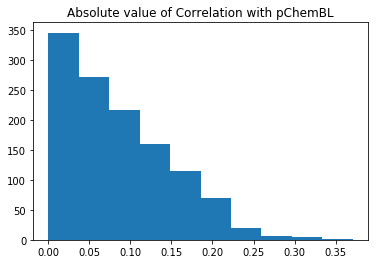

In [10]:
plt.title('Absolute value of Correlation with pChemBL')
plt.hist((correlation_matrix.iloc[:1208,1208]).abs())

In [11]:
bad_cols_index = []
for cols in range(1208):
    if correlation_matrix.abs().iloc[cols,1208] < 0.1:
        bad_cols_index.append(cols)
print(len(bad_cols_index))

bad_cols2 = []
cols = X.columns
for index in bad_cols_index:
    bad_cols2.append(cols[index])
len(bad_cols2)

757


757

In [56]:
bad_cols = bad_cols + bad_cols2

In [57]:
with open("test.txt", "wb") as fp:   #Pickling
    pickle.dump(bad_cols, fp)
with open("test.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
len(b)

993

In [12]:
X_new = X.drop(columns = bad_cols2, inplace = False).copy()

In [13]:
X_new.shape

(2861, 452)

(array([  2.,   5.,  17.,  37., 104., 134., 106., 113.,  48.,   7.]),
 array([2.88605665, 3.57945098, 4.27284532, 4.96623965, 5.65963399,
        6.35302832, 7.04642266, 7.73981699, 8.43321133, 9.12660566,
        9.82      ]),
 <a list of 10 Patch objects>)

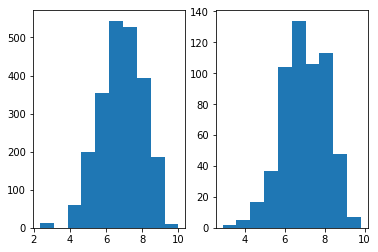

In [19]:
X_final, validate = np.split(X_new.sample(frac=1), [int(.8*len(X_new))])
plt.subplot(1,2,1)
plt.hist(X_final['pChemBL'])
plt.subplot(1,2,2)
plt.hist(validate['pChemBL'])

<h3>Removing Outliers</h3>

<h3>train-test split</h3>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)

In [21]:
X_train.head()

,nAcid,ALogP,ALogp2,nN,nO,nP,AATS1m,AATS5m,AATS6m,AATS1v,...,SRW4,SRW6,SRW8,SRW10,TSRW,WTPT-2,WTPT-4,WTPT-5,WPATH,XLogP
1939,-0.144994,-0.069034,-0.165698,0.523607,-0.688514,-0.097607,0.469553,0.623173,0.140804,0.783547,...,-0.272112,-0.169579,-0.023949,0.136118,0.166862,0.841250,-0.709842,0.660203,-0.418405,0.272080
5,-0.144994,-0.654003,0.029040,-0.351928,0.466816,-0.097607,-0.623026,-0.399569,-0.079690,-0.342235,...,-0.233081,-0.185541,-0.074843,0.066104,-0.086125,-0.106318,0.609053,-0.541808,-0.231524,-0.807197
1308,-0.144994,0.852686,-0.221832,0.085840,-0.110849,-0.097607,0.252404,-0.168009,0.617344,-0.502496,...,-0.233081,-0.129903,-0.086555,-0.056676,0.377159,-1.477573,-0.190211,0.006401,-0.332131,-1.070894
1713,-0.144994,1.184241,-0.167009,-0.789695,0.466816,-0.097607,1.255455,0.596569,1.597797,0.604053,...,-1.264278,-1.374469,-1.455125,-1.512635,-1.628440,-1.023441,0.487608,-0.791338,-0.490897,-0.809551
736,-0.144994,1.561914,-0.056205,-1.227463,-0.688514,-0.097607,1.490457,1.361173,0.988406,2.294589,...,-0.595669,-0.559209,-0.505146,-0.441976,-0.343415,1.335805,-0.598267,-1.227954,-0.503576,0.920964


In [22]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.31688901714981843

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(validate['pChemBL'],model1.predict(validate.drop(columns=['pChemBL'],inplace=False)))

0.7690898821100193

In [24]:
model1.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])

0.39328357037402417

In [25]:
model1.score(X_train,y_train)

0.7351188062129981

<h3>Dimensionality Reduction</h3>

In [26]:
X = X_new.copy()
correlation_matrix = X_new.astype('float64').corr()

In [61]:
X.shape

(2861, 452)

In [62]:
correlation_matrix.head(10)

,nAcid,ALogP,ALogp2,nN,nO,nP,AATS1m,AATS5m,AATS6m,AATS1v,...,SRW6,SRW8,SRW10,TSRW,WTPT-2,WTPT-4,WTPT-5,WPATH,XLogP,pChemBL
nAcid,1.000000,-0.064273,0.091276,-0.028988,0.149117,0.110817,-0.007205,-0.010860,0.000416,0.016273,...,0.010521,-0.002231,-0.012713,-0.011601,-0.045911,0.135359,-0.029906,0.076846,0.034116,-0.135137
ALogP,-0.064273,1.000000,-0.844694,-0.427450,-0.506982,-0.378326,0.343532,0.277910,0.307552,0.383473,...,-0.287629,-0.204105,-0.131289,-0.136728,0.206140,-0.483944,-0.376070,-0.714456,0.053686,0.177646
ALogp2,0.091276,-0.844694,1.000000,0.431520,0.549288,0.330803,-0.248513,-0.154806,-0.171166,-0.359766,...,0.276739,0.184396,0.102108,0.110065,-0.399610,0.522472,0.366677,0.829474,-0.052088,-0.176723
nN,-0.028988,-0.427450,0.431520,1.000000,-0.103358,-0.208433,-0.202040,-0.124865,-0.169760,-0.319058,...,0.533395,0.484875,0.429750,0.442469,-0.004216,-0.131584,0.993075,0.599303,-0.183032,0.123072
nO,0.149117,-0.506982,0.549288,-0.103358,1.000000,0.239777,0.000958,0.024521,0.060905,-0.302295,...,0.060878,0.010052,-0.028294,-0.039884,-0.496504,0.996516,-0.140161,0.445426,-0.295219,-0.171309
nP,0.110817,-0.378326,0.330803,-0.208433,0.239777,1.000000,-0.168155,-0.167613,-0.161761,-0.294250,...,-0.078372,-0.133558,-0.173868,-0.166587,-0.291358,0.246378,-0.217039,0.103589,0.245795,-0.146784
AATS1m,-0.007205,0.343532,-0.248513,-0.202040,0.000958,-0.168155,1.000000,0.817940,0.841293,0.716789,...,-0.192187,-0.150406,-0.115411,-0.118398,-0.092411,-0.023207,-0.210253,-0.268406,-0.047142,-0.109517
AATS5m,-0.010860,0.277910,-0.154806,-0.124865,0.024521,-0.167613,0.817940,1.000000,0.907150,0.650092,...,-0.203448,-0.165284,-0.127157,-0.126474,-0.083103,0.012732,-0.140978,-0.199419,-0.049987,-0.117754
AATS6m,0.000416,0.307552,-0.171166,-0.169760,0.060905,-0.161761,0.841293,0.907150,1.000000,0.619052,...,-0.248497,-0.210027,-0.172841,-0.177042,-0.104408,0.048806,-0.182658,-0.232336,-0.106229,-0.104852
AATS1v,0.016273,0.383473,-0.359766,-0.319058,-0.302295,-0.294250,0.716789,0.650092,0.619052,1.000000,...,-0.127645,-0.063492,-0.009343,-0.010209,0.388078,-0.316743,-0.325464,-0.311237,0.326725,-0.106029


In [63]:
correlated_vars = []
for ind in correlation_matrix.index:
    for col in correlation_matrix.columns:
        if correlation_matrix.loc[ind,col] >0.5:
            chk = 0
            for l in correlated_vars:
                if (ind in l) or (col in l):
                    if (ind in l):
                            chk = 1
                            if col not in l:
                                l.append(col)
                            break
                    elif col in l:
                            chk = 1
                            if ind not in l:
                                l.append(ind)
            if chk == 0:
                correlated_vars.append([ind,col])
print(len(correlated_vars))

53


hmm

In [64]:
total = 0
for l in correlated_vars:
    total += len(l)
print(total)

950


In [76]:
X.head()

,nAcid,ALogP,ALogp2,nN,nO,nP,AATS1m,AATS5m,AATS6m,AATS1v,...,SRW6,SRW8,SRW10,TSRW,WTPT-2,WTPT-4,WTPT-5,WPATH,XLogP,pChemBL
0,-0.144994,0.135812,-0.204684,-0.351928,1.044481,-0.097607,-0.805304,-0.515357,-0.786081,-0.975157,...,0.387045,0.444588,0.494858,0.362547,0.553669,1.173686,-0.209875,-0.057874,-0.523722,6.82
1,-0.144994,-0.310382,-0.100324,-0.351928,-0.688514,-0.097607,-0.317264,-0.387132,-0.138641,1.122305,...,0.743373,1.007296,1.204127,1.123459,1.424733,-0.719429,-0.398305,-0.281414,1.542066,7.64
2,-0.144994,0.605186,-0.236884,0.523607,-0.688514,-0.097607,0.472994,0.699421,0.655151,0.984264,...,0.595781,0.448506,0.297617,0.290078,0.132785,-0.721436,0.587844,0.376252,1.077770,4.30
3,-0.144994,-5.440810,6.264636,4.025748,3.355141,-0.097607,-1.617230,-0.744881,-0.909205,-2.270115,...,2.259198,1.674946,1.123067,1.202145,-2.898530,3.133633,3.415884,4.913489,-1.645378,6.03
4,-0.144994,-0.508657,-0.030882,-2.102998,1.622146,-0.097607,0.192689,0.488200,0.893433,1.703936,...,0.025655,0.136638,0.240241,0.341054,0.743142,1.693352,-2.187896,-0.356938,0.726958,6.42


In [27]:
comps = 60
pca = PCA(n_components=comps)
principalComponents = pca.fit_transform(X.drop(columns=['pChemBL'],inplace=False))
cols = []
for i in range(comps):
    cols.append('comp'+str(i+1))
X_red = pd.DataFrame(data=principalComponents, columns=cols)

In [77]:
with open('./saved_models/pca.pkl','wb') as fp:
    pickle.dump(pca.fit(X.drop(columns=['pChemBL'],inplace=False)),fp)

In [28]:
X_red['pChemBL'] = X['pChemBL']
X_red.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,...,comp52,comp53,comp54,comp55,comp56,comp57,comp58,comp59,comp60,pChemBL
0,-0.026369,-1.830329,-7.903487,1.643947,-2.474449,1.020061,2.788774,1.553599,-2.535732,-1.206244,...,0.216956,1.883162,-0.140266,-0.325158,-0.095970,0.108721,0.238440,0.749977,0.279397,6.82
1,-1.109886,-7.786778,4.454236,0.001993,-3.393371,0.306154,-2.565075,4.043166,1.057393,3.038957,...,-0.362763,-0.431638,0.154056,-0.371731,0.574447,-0.172602,0.033124,0.443015,0.298328,7.64
2,5.265032,-1.634803,7.775393,-2.942013,3.965358,-5.699987,-2.972947,-1.705638,-1.922867,-1.071082,...,0.068009,0.829394,-0.209079,-1.240088,-0.327736,-0.377044,-0.680622,-0.891741,-1.081944,4.30
3,49.710585,24.756477,7.664821,-13.246366,-3.485137,4.062453,4.117190,-4.986691,-0.529334,-0.489175,...,-0.561661,0.894434,-2.264003,0.236093,0.626044,-1.681880,0.614291,-0.040679,0.293662,6.03
4,-4.740560,-3.537532,6.306721,-3.066811,-3.022726,2.072264,-2.865394,4.497930,0.736539,2.472531,...,0.371608,0.691905,-1.390275,-0.134810,-1.710508,1.107623,0.321438,0.045225,-1.414249,6.42


<h3>Creation of validation set</h3>

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,...,comp52,comp53,comp54,comp55,comp56,comp57,comp58,comp59,comp60,pChemBL
1655,5.058762,-10.921687,7.577268,-2.497916,1.461241,-2.028495,2.405866,2.799840,8.709023,4.110811,...,0.641599,0.656555,-0.148173,-2.977831,-0.435770,0.642606,-0.452627,0.748675,-1.137114,5.03
262,56.339827,27.181635,7.457601,-18.210805,-5.012342,1.589382,5.997553,-6.731744,-0.149957,-0.171269,...,-0.598763,-1.414050,-2.203325,-0.155926,-0.181025,-0.462497,-0.297557,1.451385,-3.184216,6.04
2606,-0.732374,-0.288411,-0.318048,-2.920262,10.981220,-3.344892,7.640611,3.312448,-5.137104,5.303468,...,0.771408,0.334204,-0.356801,0.043734,-0.915106,0.141936,1.032927,-0.529172,-0.166476,6.52
2392,0.004871,0.157434,-7.204873,-0.166537,-4.716886,-1.348453,-5.712406,-3.357466,-1.315251,3.166259,...,0.873583,0.830247,-0.123577,-0.391487,-0.643329,0.721529,0.134285,-0.189323,-0.170985,6.30
136,-8.962205,1.705393,3.703537,-3.103261,2.588986,0.402775,-2.573646,-7.034928,6.012201,0.755158,...,1.295802,-0.388533,-0.063824,-0.273677,-0.313499,0.980006,-0.449715,0.020727,0.061008,6.39


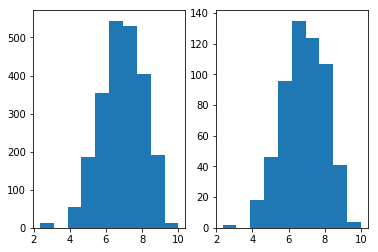

In [29]:
X_final, validate = np.split(X_red.sample(frac=1), [int(.8*len(X_new))])
plt.subplot(1,2,1)
plt.hist(X_final['pChemBL'])
plt.subplot(1,2,2)
plt.hist(validate['pChemBL'])
X_final.head()

<h3>Best Linear Model

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)

In [67]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
r_square = model1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.8357047269682706	 R^2 = 0.4504732858067208


In [68]:
r_square = model1.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],model1.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Validation set results
RMSE = 0.8279202850568418	 R^2 = 0.44270860884654906


<h4>Ridge Regression</h4>

In [89]:
rr = Ridge(alpha=0.001)
rr1 = Ridge(alpha=1)
rr2 = Ridge(alpha=1000)

In [90]:
rr.fit(X_train,y_train)
rr1.fit(X_train,y_train)
rr2.fit(X_train,y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
r_square = rr.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(rr.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = rr1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(rr1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = rr2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(rr2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.8357047269682708	 R^2 = 0.45047328580672075
Test set results
RMSE = 0.8356657848001053	 R^2 = 0.4505244983042258
Test set results
RMSE = 0.8293743939193905	 R^2 = 0.4587669133330584


In [92]:
r_square = rr2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],rr2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Validation set results
RMSE = 0.8280666633991377	 R^2 = 0.44251153044938907


<b>Conclusion:</b> alpha=1000 gives best RMSE and R^2 values. Scanned from 0 to 10000

<h4>Lasso Regression</h4>

In [109]:
l = Lasso(alpha=0.001)
l1 = Lasso(alpha=0.1)
l2 = Lasso(alpha=0.01)

In [110]:
l.fit(X_train,y_train)
l1.fit(X_train,y_train)
l2.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
r_square = l.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(l.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = l1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(l1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = l2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(l2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.8349550071563806	 R^2 = 0.4514588163432105
Test set results
RMSE = 0.8803567077646003	 R^2 = 0.39018170747526015
Test set results
RMSE = 0.8300233749502883	 R^2 = 0.45791955794146744


In [112]:
r_square = l2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],l2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Validation set results
RMSE = 0.8241645583518988	 R^2 = 0.4477532655414225


<b>Conclusion:</b>Best alpha=0.01(scanned from 0 to 1000)

In [69]:
correlations = X_red.corr()
np.linalg.cond(correlations)

5.934418106078555

In [70]:
u, s, v = np.linalg.svd(X_red.drop(columns='pChemBL',inplace = False))

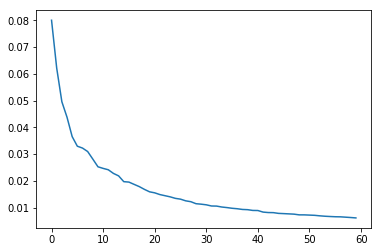

[7.9988486  6.21035135 4.95352992 4.3747847  3.65013119 3.29224129
 3.22250684 3.09325766 2.81071846 2.52289856 2.46325555 2.41216662
 2.27533672 2.18361937 1.96770747 1.95137446 1.86655073 1.78320324
 1.67962289 1.58799504 1.54987921 1.48526261 1.44247001 1.39965977
 1.34372369 1.31407665 1.25128926 1.21866467 1.14403518 1.1261577
 1.10223745 1.0584257  1.05449182 1.01990582 0.99891573 0.97297138
 0.95570745 0.92932281 0.92077503 0.89270132 0.88901359 0.83066164
 0.81353684 0.80994523 0.7823094  0.77344595 0.76365332 0.75363348
 0.72701507 0.72653551 0.71803362 0.70970794 0.69069709 0.67554667
 0.66520061 0.65643889 0.65331267 0.64041317 0.62737394 0.61275146]


In [71]:
plt.plot(range(len(s)),s/sum(s))
plt.show()
print(s/sum(s)*100)

In [130]:
X_red2 = u[:,:20] @ np.diag(s[:20]) @ v[:20,:]
X_red2 = pd.DataFrame(data=X_red2,columns=X_red.drop(columns='pChemBL',inplace=False).columns)

<h4>Linear model-4 (after SVD)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_red2, X['pChemBL'], test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train,y_train)
r_square = model1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.9594146665419837	 R^2 = 0.31256545240402756


<h3>Random Forest Regressor</h3>
Dataset used: 60 component PCA

In [79]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators= 250)
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
X_final.shape

(2288, 61)

In [81]:
r_square = model2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = model2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],model2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.7459983505291639	 R^2 = 0.5892647086467816
Validation set results
RMSE = 0.7247339420088617	 R^2 = 0.6252830917056436


In [72]:
pickle.dump(model2, open('./saved_models.pkl', 'wb'))
with open("./saved_models/drop2.txt","wb") as fp:
    pickle.dump(bad_cols2,fp)

In [74]:
Pkl_Filename = './saved_models/predictor.pkl'
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model2, file)
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)
Pickled_Model.score(X_test,y_test)

0.5822062118987668

In [41]:
import pickle
with open('./saved_models/predictor.pkl','rb') as fp:
    pp = pickle.load(fp)
X_red.sort_values(by=['pChemBL'],ascending=False,inplace=True)
prediction = pp.predict(X_red.drop(columns='pChemBL',inplace=False))

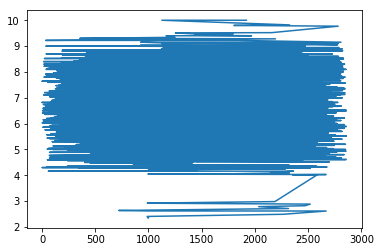

In [42]:
plt.plot(X_red['pChemBL'])
#plt.plot(range(1,len(prediction)+1),prediction,'x')

<h3>Optimising PCA</h3>

In [304]:
X = pd.read_csv('./no_zeros_no_chembl.csv')
print(X.shape)
y = X['pChemBL']
X.drop(columns='pChemBL',inplace = True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)
scaler.fit(X)
X2 = scaler.transform(X)#.drop(columns=['ChemBLID'],inplace=False))
X = pd.DataFrame(data=X2,columns=X.columns)

(2861, 1211)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [232]:
u, s, v = np.linalg.svd(X)
sums = [s[0]]
for i in range(1,len(s)):
        sums.append(sums[i-1]+s[i])
sums = sums/sum(s)

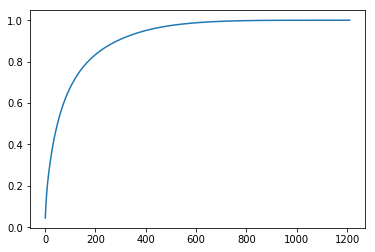

In [233]:
plt.plot(range(1,len(sums)+1),sums)

In [230]:
X['pChemBL'] = y
sums[1210]

1.0

In [247]:
compss = []
for i in range(205,300):
    if(i%5==0):
        compss.append(i)
print(compss)

[205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295]


In [249]:
RMSEs = []
RSQUAREs = []
for comps in compss:
    pca = PCA(n_components=comps)
    principalComponents = pca.fit_transform(X.drop(columns=['pChemBL'],inplace=False))
    cols = []
    for i in range(comps):
        cols.append('comp'+str(i+1))
    X_red = pd.DataFrame(data=principalComponents, columns=cols)
    X_red['pChemBL'] = X['pChemBL']
    X_final, validate = np.split(X_red.sample(frac=1), [int(.9*len(X_red))])
    X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
    model1 = LinearRegression()
    model1.fit(X_train,y_train)
    r_square = model1.score(X_test,y_test)
    rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
    print("Test set {} results\nRMSE = {}\t R^2 = {}".format(comps,rmse,r_square))
    RMSEs.append(rmse)
    RSQUAREs.append(r_square)

Test set 205 results
RMSE = 10.655629855218999	 R^2 = -81.63832583963884
Test set 210 results
RMSE = 0.777847465324429	 R^2 = 0.550274120146212
Test set 215 results
RMSE = 0.8050139185067158	 R^2 = 0.5250940309314437
Test set 220 results
RMSE = 0.7748794160020659	 R^2 = 0.5908477342724459
Test set 225 results
RMSE = 1.0902629679750702	 R^2 = 0.1606885079484921
Test set 230 results
RMSE = 1.1640211745683546	 R^2 = 0.08725217597647904
Test set 235 results
RMSE = 0.8498461772792737	 R^2 = 0.45737005826486826
Test set 240 results
RMSE = 1.3722446412364473	 R^2 = -0.4163199297917859
Test set 245 results
RMSE = 35.00518009920438	 R^2 = -947.6119450608967
Test set 250 results
RMSE = 0.9731624649414706	 R^2 = 0.2859745942177079
Test set 255 results
RMSE = 0.7501324289313824	 R^2 = 0.569781633733459
Test set 260 results
RMSE = 1.4839285718215023	 R^2 = -0.5681837046063922
Test set 265 results
RMSE = 1.7348885927595128	 R^2 = -1.294839985447962
Test set 270 results
RMSE = 4.322371923728247	 R^2 

In [306]:
comps = 220

pca = PCA(n_components=comps)
principalComponents = pca.fit_transform(X)
cols = []
for i in range(comps):
    cols.append('comp'+str(i+1))
X_red = pd.DataFrame(data=principalComponents, columns=cols)
X_red['pChemBL'] = y
X_final, validate = np.split(X_red.sample(frac=1), [int(.9*len(X_red))])
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train,y_train)
r_square = model1.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model1.predict(X_test),y_test))
print("Test set {} results\nRMSE = {}\t R^2 = {}".format(comps,rmse,r_square))
RMSEs.append(rmse)
RSQUAREs.append(r_square)

Test set 220 results
RMSE = 0.7844385580296086	 R^2 = 0.48211972206721093


<h4>Steps</h4>
<ol>
    <li>Scanned between 200 and 600 components-200to 300 best range; best current value-270</li>
    <li></li>
    <li></li>
    <li></li>
<ol>

In [244]:
print(RSQUAREs)

[-12.48965624444502, 0.4698637044581088, 0.49432098503613453, 0.2877255309229182, 0.5066996776435349, -137.94311934329238, -126.7380460286967, -2.3991198363432584, 0.5339739282766565, -1.5998148437466115, -3.5290301317457047, 0.22650860171835374, -1.546871271176174, 0.552852253207766, -6.021329136219571, -16.889078387954854, -33.288973021781004, -268.8280503547565, 0.5479995159362296, 0.5447862481113162, -3.4998404158384284, 0.37467215338205784, 0.3612257221162466, 0.506241181751081, -14.848358207704724, -62.13444145979891, 0.5233319004079454, -2.1012054103539763, -112.37311596857514, -6.966908403394978, -2.5122505217138866, 0.4008098326013475, -17.307965547873856, -1413.7777439869428, -0.09924998709729381, 0.5466281436117173, -36.09645195575285, -33.208131914246636, 0.553445535747684, -13387.297013950643, -102.67142992079691, 0.5171192186896595, 0.4198042163762725, -23.452538912239454, -386.7944544063501, 0.46955088841187825, 0.4441795614522081, -7.187205700691073, 0.525535265767203, 

In [307]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators= 250)
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(columns=['pChemBL'],inplace=False), X_final['pChemBL'], test_size=0.2, random_state=42)
model2.fit(X_train,y_train)
r_square = model2.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(model2.predict(X_test),y_test))
print("Test set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))
r_square = model2.score(validate.drop(columns=['pChemBL'],inplace=False),validate['pChemBL'])
rmse = np.sqrt(mean_squared_error(validate['pChemBL'],model2.predict(validate.drop(columns=['pChemBL'],inplace=False))))
print("Validation set results\nRMSE = {}\t R^2 = {}".format(rmse,r_square))

Test set results
RMSE = 0.7584178712514936	 R^2 = 0.5159072001189291
Validation set results
RMSE = 0.7897069517351748	 R^2 = 0.5681427171462918


<b>Conclusion</b>: Not helping much

<h2>Final Best Results</h2>:
<ol>
    <li>RFR:<br>
       Test set results<br>
        RMSE = 0.743 R^2 = 0.566<br>
       Validation set results<br>
       RMSE = 0.714	 R^2 = 0.585
    </li>
    <li>Linear Model(Lasso, alpha=0.01)<br>
            Validation set results<br>
            RMSE = 0.824	 R^2 = 0.448
    </li>